# Market Basket Analysis 

<img src = "basket_analysis.png" height=400 width= 400 align="left">

**Market Basket** is defined as an itemset bought together by a customer on a single visit to a store.

**Market Basket Analysis** is the study of customer transaction databases to determine dependencies between the various items they purchase at different times

It is a powerful tool for the implementation of cross-selling strategies.




---

<img src = "assocuation_rules.png" height=400 width= 400 align="left">

**Association rule learning** is a rule-based machine learning method to identify frequent if-then associations called association rules (e.g. If tea and milk are purchased, then sugar would also be bought by the customer)

Association Rules are widely used to analyze **retail basket** or transaction data. 


---

<img src = "apiori3.png" height=400 width= 400 align="left">

**Apriori algorithm** is a popular algorithm for frequent item set mining and association rule learning over relational databases

It it designed to operate on a list of **transactions** (e.g. shopping baskets)

It provides information about statistical relationships between groups of items - particularly how presence of **certain group of items can influence the probability of another item** (or group of items) occuring in a transaction.

 
 

---

## Apriori terms 

<img src = "apriori_terms.png" height=500 width= 500 align="left">

**Support** - proportion of transactions that contain a particular group of items.

**Confidence** - conditional probability of a group of items, given that another group is present

**Lift** - scaling factor between original support for the group of items and the confidence (how much the probability is “lifted” up)

### Calculation
Total transactions number: $n = 5$
<br>Transaction that contains A: $n(A) = 3$
<br>**Support (A)** is the probability of A: $P(A) = \Large{\frac{3}{5}}$

<br>Transaction that contains A and D: $n(AD) = 2$
<br>Support (AD) is the probability of A and D : $P(AD) = \Large{\frac{2}{5}}$

**Confidence (A => D)** is the condininal probability of D given A: 
$P(D|A) = S(AD) : S(A) = \Large{\frac{2}{5}   : \frac{3}{5}   =  \frac{2}{3}} $

Transactions that contains D: n(D) = 3
<br>**Support(D)** is the probability of D: $P(D) = \Large{\frac{3}{5}}$

**Lift(A => D)** is the ratio of probability of D to condinional probability of D gien A: 
$P(D|A) : P(D) = \Large{\frac{2}{3}   : \frac{3}{5}   =  \frac{10}{9}}$ 

## Apriori implementation   

### Install packages if necessary

In [2]:
!pip install apyori

### Import necessary packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori


In [76]:
help(apriori)

Help on function apriori in module apyori:

apriori(transactions, **kwargs)
    Executes Apriori algorithm and returns a RelationRecord generator.
    
    Arguments:
        transactions -- A transaction iterable object
                        (eg. [['A', 'B'], ['B', 'C']]).
    
    Keyword arguments:
        min_support -- The minimum support of relations (float).
        min_confidence -- The minimum confidence of relations (float).
        min_lift -- The minimum lift of relations (float).
        max_length -- The maximum length of the relation (integer).



### Load the data

In [12]:
dataset= df= pd.read_csv('Market_Basket_Optimisation.csv', header = None)
df.head()
# Note: each row is transaction
#  the same items are not in the same columns  - just sequence 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.shape

(7501, 20)

### Fill missed 

Note: model accepts nan but in str only

In [15]:
df= df.fillna(0)


In [16]:
trans= df.values.tolist()
trans[:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 ['chutney', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['turkey', 'avocado', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0]]

### Strip transaction

In [17]:
trans_stripped = [[item for item in tr if item] for tr in trans]
trans_stripped

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

### Learn rules 

In [20]:
rules = list(apriori(trans_stripped, min_support = 0.003, min_confidence = 0.2, min_lift = 4, min_length = 2))
rules

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0.2450980392156863, lift=5.164270764485569)]),
 RelationRecord(items=frozenset({'olive oil', 'whole wheat pasta'}), support=0.007998933475536596, ordered_statistics=[OrderedStatistic(items_base=frozenset({'whole wheat pasta'}), items_add=frozenset({'olive oil'}), confidence=0.271

In [21]:
len(rules)

23

#### Note: Results depends on configuration of parameters e.g. setting the min lift to lower value will learm more rules

In [48]:
rules = list(apriori(trans_stripped, min_support = 0.003, min_confidence = 0.2, min_lift = 2, min_length = 2))
rules

[RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)]),
 RelationRecord(items=frozenset({'spaghetti', 'bacon'}), support=0.003199573390214638, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bacon'}), items_add=frozenset({'spaghetti'}), confidence=0.36923076923076925, lift=2.1206738131699847)]),
 RelationRecord(items=frozenset({'milk', 'black tea'}), support=0.004266097853619517, ordered_statistics=[OrderedStatistic(items_base=frozenset({'black tea'}), items_add=frozenset({'milk'}), confidence=0.29906542056074764, lift=2.3079112341833006)]),
 RelationRecord(items=frozenset({'spaghetti', 'blueberries'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'blueberries'}), items_add=frozenset({'spaghetti'}), confidence=0.37681159420289856, lift=2

In [49]:
len(rules)

343

### Explanation

```RelationRecord(items=frozenset({'avocado', 'spaghetti', 'milk'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'avocado', 'spaghetti'}), items_add=frozenset({'milk'}), confidence=0.41666666666666663, lift=3.215449245541838)])
```


The support value for the rule is 0
.003. This number is calculated by dividing the number of transactions containing ‘avocado,’ ‘spaghetti,’ and ‘milk’ by the total number of transactions.

The confidence level for the rule is 0.416, which shows that out of all the transactions that contain both ‘avocado’ and ‘spaghetti’, 41.6 percent contain ‘milk’ too.

The lift of 3.215 tells us that ‘milk’ is 3.215 times more likely to be bought by the customers who buy both ‘avocado’ and ‘spaghetti’ compared to the default likelihood sale of ‘milk.’

### Print rules with more details 

In [9]:
def print_rules(rules):
    for rule in rules:
        print ('rule.items=', list(rule.items))
        print ('rule.support=',rule.support)

        for os in rule.ordered_statistics:
            print ('\titems_base=', list(os.items_base))
            print ('\tlifted_item =', list(os.items_add))
            print ('\tlift=', os.lift)
            print ('\tconfidence (i.e. cond prob {} if {})='.format(list(os.items_add), list(os.items_base)), os.confidence)
            print ('\n')
        
print_rules(rules)
        
    

rule.items= ['UHT', 'milk']
rule.support= 0.00833225848058816
	items_base= ['UHT']
	lifted_item = ['milk']
	lift= 12.167294413057125
	confidence (i.e. cond prob ['milk'] if ['UHT'])= 1.0


rule.items= ['articles', 'hygiene']
rule.support= 0.0053656649039081645
	items_base= ['articles']
	lifted_item = ['hygiene']
	lift= 186.37019230769232
	confidence (i.e. cond prob ['hygiene'] if ['articles'])= 1.0


	items_base= ['hygiene']
	lifted_item = ['articles']
	lift= 186.37019230769232
	confidence (i.e. cond prob ['articles'] if ['hygiene'])= 1.0


rule.items= ['bags', 'shopping']
rule.support= 0.0188572165613311
	items_base= ['bags']
	lifted_item = ['shopping']
	lift= 47.91718170580964
	confidence (i.e. cond prob ['shopping'] if ['bags'])= 0.9035846724351051


	items_base= ['shopping']
	lifted_item = ['bags']
	lift= 47.91718170580964
	confidence (i.e. cond prob ['bags'] if ['shopping'])= 1.0


rule.items= ['bakery', 'life']
rule.support= 0.0069392493228427705
	items_base= ['bakery']
	lifted_i

#### Note: Rule may contain multi ordered statistics


In [54]:
def print_rules_multi_os(rules):
    for rule in rules:
        if len (rule.ordered_statistics)>1:  
            print ('rule.items=', list(rule.items))
            for os in rule.ordered_statistics:
                print ('\n\titems_base=', list(os.items_base))
                print ('\tlifted_item =', list(os.items_add))
                print ('\tlift=', os.lift)
                print ('\tconfidence (i.e. cond prob {} if {})='.format(list(os.items_add), list(os.items_base)), os.confidence)

            break 

print_rules_multi_os(rules)
        
    

rule.items= ['spaghetti', 'ground beef']

	items_base= ['ground beef']
	lifted_item = ['spaghetti']
	lift= 2.291162176033379
	confidence (i.e. cond prob ['spaghetti'] if ['ground beef'])= 0.3989145183175034

	items_base= ['spaghetti']
	lifted_item = ['ground beef']
	lift= 2.2911621760333793
	confidence (i.e. cond prob ['ground beef'] if ['spaghetti'])= 0.22511485451761104


### Access to terms values 

In [59]:
rules[0]

RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)])

In [60]:
type(rules[0])

apyori.RelationRecord

In [61]:
list(rules[0].items)

['burgers', 'almonds']

In [62]:
rules[0].support

0.005199306759098787

In [63]:
rules[0].ordered_statistics

[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)]

In [64]:
rules[0].ordered_statistics[0]

OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)

#### Review possible values of amount of ordered statistics in rule

In [65]:
print ('possible  amount of ordered_statistics:')
set([len(r.ordered_statistics) for r in rules])

possible  amount of ordered_statistics:


{1, 2, 3, 4, 5, 6}

In [67]:
list(rules[0].ordered_statistics[0].items_base)

['almonds']

In [68]:
list(rules[0].ordered_statistics[0].items_add)

['burgers']

In [69]:
rules[0].ordered_statistics[0].lift

2.923577382023146

In [70]:
rules[0].ordered_statistics[0].confidence

0.25490196078431376

## Sanity check

In [71]:
trs= [
    ['a'],
    [],
    ['a','m'],
    [],
    ['a','m'],
    ['m'],
    ['a','m'],
    ['a'],
    [],
    ['a'],
    ['a'],
    ['a','m'],
    ['a','m'],
]
len(trs)

13

In [72]:
rules_am= list(apriori(trs))
rules_am

[RelationRecord(items=frozenset({'a'}), support=0.6923076923076923, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'a'}), confidence=0.6923076923076923, lift=1.0)]),
 RelationRecord(items=frozenset({'m'}), support=0.46153846153846156, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'m'}), confidence=0.46153846153846156, lift=1.0)]),
 RelationRecord(items=frozenset({'m', 'a'}), support=0.38461538461538464, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'m', 'a'}), confidence=0.38461538461538464, lift=1.0), OrderedStatistic(items_base=frozenset({'a'}), items_add=frozenset({'m'}), confidence=0.5555555555555556, lift=1.2037037037037037), OrderedStatistic(items_base=frozenset({'m'}), items_add=frozenset({'a'}), confidence=0.8333333333333334, lift=1.2037037037037037)])]

In [73]:
print_rules(rules_am)

rule.items= ['a']
rule.support= 0.6923076923076923
	items_base= []
	lifted_item = ['a']
	lift= 1.0
	confidence (i.e. cond prob ['a'] if [])= 0.6923076923076923


rule.items= ['m']
rule.support= 0.46153846153846156
	items_base= []
	lifted_item = ['m']
	lift= 1.0
	confidence (i.e. cond prob ['m'] if [])= 0.46153846153846156


rule.items= ['m', 'a']
rule.support= 0.38461538461538464
	items_base= []
	lifted_item = ['m', 'a']
	lift= 1.0
	confidence (i.e. cond prob ['m', 'a'] if [])= 0.38461538461538464


	items_base= ['a']
	lifted_item = ['m']
	lift= 1.2037037037037037
	confidence (i.e. cond prob ['m'] if ['a'])= 0.5555555555555556


	items_base= ['m']
	lifted_item = ['a']
	lift= 1.2037037037037037
	confidence (i.e. cond prob ['a'] if ['m'])= 0.8333333333333334




Compare on one rule ordered statistics: 
```
rule.items= ['a', 'm']
rule.support= 0.38461538461538464

    items_base= ['a']
    lifted_item = ['m']
    lift= 1.2037037037037037
    confidence (i.e. cond prob ['m'] if ['a'])= 0.5555555555555556
```

Manual calculation  
```
S(A) = 9/13
S(M) = 6/13 
S(AM) = 5/13 = 0.3846 
C(A => M) = S(AM) / S(A) = 5/13  / 9/13 =  5/9 = .5555
L(A => M) =  5/9 / 6/13 = 65/54= 1.2

```



# Hometask 

Mine top 10 association rules worth recommending for 
[Groceries dataset](https://www.kaggle.com/heeraldedhia/groceries-dataset)

In [2]:
import re

import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [4]:
df = pd.read_csv('data/Groceries_dataset.csv')
df.head ()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
len(df)

38765

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

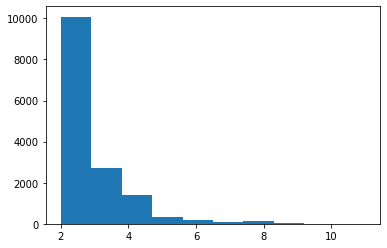

In [6]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [7]:
items = df["itemDescription"].values

transactions = [re.findall(r"\w+", item) for item in items]
transactions[:3]

[['tropical', 'fruit'], ['whole', 'milk'], ['pip', 'fruit']]

In [8]:
rules = list(apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 4, min_length = 2))
print(len(rules))
print(rules[:3])

66
[RelationRecord(items=frozenset({'UHT', 'milk'}), support=0.00833225848058816, ordered_statistics=[OrderedStatistic(items_base=frozenset({'UHT'}), items_add=frozenset({'milk'}), confidence=1.0, lift=12.167294413057125)]), RelationRecord(items=frozenset({'articles', 'hygiene'}), support=0.0053656649039081645, ordered_statistics=[OrderedStatistic(items_base=frozenset({'articles'}), items_add=frozenset({'hygiene'}), confidence=1.0, lift=186.37019230769232), OrderedStatistic(items_base=frozenset({'hygiene'}), items_add=frozenset({'articles'}), confidence=1.0, lift=186.37019230769232)]), RelationRecord(items=frozenset({'bags', 'shopping'}), support=0.0188572165613311, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bags'}), items_add=frozenset({'shopping'}), confidence=0.9035846724351051, lift=47.91718170580964), OrderedStatistic(items_base=frozenset({'shopping'}), items_add=frozenset({'bags'}), confidence=1.0, lift=47.91718170580964)])]


In [10]:
print_rules(rules)

rule.items= ['UHT', 'milk']
rule.support= 0.00833225848058816
	items_base= ['UHT']
	lifted_item = ['milk']
	lift= 12.167294413057125
	confidence (i.e. cond prob ['milk'] if ['UHT'])= 1.0


rule.items= ['articles', 'hygiene']
rule.support= 0.0053656649039081645
	items_base= ['articles']
	lifted_item = ['hygiene']
	lift= 186.37019230769232
	confidence (i.e. cond prob ['hygiene'] if ['articles'])= 1.0


	items_base= ['hygiene']
	lifted_item = ['articles']
	lift= 186.37019230769232
	confidence (i.e. cond prob ['articles'] if ['hygiene'])= 1.0


rule.items= ['bags', 'shopping']
rule.support= 0.0188572165613311
	items_base= ['bags']
	lifted_item = ['shopping']
	lift= 47.91718170580964
	confidence (i.e. cond prob ['shopping'] if ['bags'])= 0.9035846724351051


	items_base= ['shopping']
	lifted_item = ['bags']
	lift= 47.91718170580964
	confidence (i.e. cond prob ['bags'] if ['shopping'])= 1.0


rule.items= ['bakery', 'life']
rule.support= 0.0069392493228427705
	items_base= ['bakery']
	lifted_i

## Learn more

[How to conduct market basket analysis](https://towardsdatascience.com/how-to-conduct-market-basket-analysis-f14f391a8625)

[DATA MINING : MARKET BASKET ANALYSIS (PART 1)](https://medium.com/@wisnuprsj/data-mining-market-basket-analysis-5fa641f59eeb)

[Association Rules (AR)](https://www.nosimpler.me/association-rules/)